
# `@WeRateDogs`?  We rate `@WeRateDogs`!

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#shouji">收集数据</a></li>
<li><a href="#pinggu">评估数据</a></li>
&emsp;<a href="#wenti">存在问题</a>
<li><a href="#qingli">清理数据</a></li>
<li><a href="#fenxi">存储、分析及可视化</a></li>
&emsp;<a href="#jielun">结论</a>
</ul>

<a id='intro'></a>
## 简介
&emsp;　现实世界的数据一般不干净。使用 Python 和 Python 库，你可以收集各种来源和形式的数据，评估质量和清洁度，然后进行清洗。最后进行分析及可视化。  

**数据集介绍**： 通过不同的方式收集推特用户 [@dog_rates](https://twitter.com/dog_rates) 的档案, 也叫做 [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs)。推特用户 WeRateDogs 以诙谐幽默的方式对人们的宠物狗评级。这些评级通常以 10 作为分母。但是分子呢？分子一般大于 10。 11/10、12/10、13/10 等，为什么呢？因为 [“Brent 它们是好狗。”](http://knowyourmeme.com/memes/theyre-good-dogs-brent)  

In [1]:
#导入包
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import re

%matplotlib inline

<a id='shouji'></a>
## 收集数据
### 从已下载文件中直接读取

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
with open('tweet_json.txt', 'r') as f:    # 逐行读取    
    data = (line for line in f)  # 格式化，然后每行作为list的一个元素    
    data_json = "[{}]".format(','.join(data))
    tweet_json = pd.read_json(data_json)[['id', 'retweet_count', 'favorite_count']]

### 从网站下载数据

In [4]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url,verify=False)

with open('E:\\DAND\DAND data\\project_2\\'+url.split('/')[-1],mode = 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv(url.split('/')[-1], sep='\t')

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000000000B2E60F0>: Failed to establish a new connection: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。',))

<a id='pinggu'></a>
## 评估数据

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
type(twitter_archive.timestamp[0])

str

In [10]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [11]:
#检查tweetid是否等长
length = []
for i in range(twitter_archive.tweet_id.shape[0]):
    length.append(len(twitter_archive.tweet_id.astype(str)[i]))
# != 18
set(length)

{18}

In [12]:
twitter_archive.timestamp[0]

'2017-08-01 16:23:56 +0000'

In [13]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
twitter_archive[twitter_archive.rating_numerator < twitter_archive.rating_denominator]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None


In [15]:
sorted(twitter_archive.name.unique(),reverse = True)

['very',
 'unacceptable',
 'this',
 'the',
 'such',
 'space',
 'quite',
 'one',
 'old',
 'officially',
 'not',
 'my',
 'mad',
 'light',
 'life',
 'just',
 'infuriating',
 'incredibly',
 'his',
 'getting',
 'by',
 'an',
 'all',
 'actually',
 'a',
 'Zuzu',
 'Zooey',
 'Zoey',
 'Zoe',
 'Ziva',
 'Zeus',
 'Zeke',
 'Zeek',
 'Zara',
 'Yukon',
 'Yogi',
 'Yoda',
 'Wyatt',
 'Wishes',
 'Winston',
 'Winnie',
 'Winifred',
 'Wilson',
 'Willy',
 'Willow',
 'Willie',
 'William',
 'Willem',
 'Wiggles',
 'Wesley',
 'Watson',
 'Walter',
 'Wally',
 'Wallace',
 'Walker',
 'Waffles',
 'Wafer',
 'Vixen',
 'Vinscent',
 'Vinnie',
 'Vincent',
 'Vince',
 'Venti',
 'Ulysses',
 'Tyrus',
 'Tyrone',
 'Tyr',
 'Tycho',
 'Tupawc',
 'Tug',
 'Tuco',
 'Tucker',
 'Tuck',
 'Trooper',
 'Tripp',
 'Trip',
 'Trigger',
 'Trevith',
 'Traviss',
 'Travis',
 'Tove',
 'Torque',
 'Tonks',
 'Tommy',
 'Tom',
 'Toffee',
 'Todo',
 'Toby',
 'Tobi',
 'Tito',
 'Titan',
 'Tino',
 'Timofy',
 'Timmy',
 'Timison',
 'Timber',
 'Tilly',
 'Tiger',
 

In [16]:
#检查是否有数据同时具有多个狗狗级别
twitter_archive[(twitter_archive.doggo == 'doggo') & ((twitter_archive.floofer != 'None')|(twitter_archive.pupper != 'None')|(twitter_archive.puppo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [17]:
(twitter_archive[(twitter_archive.doggo == 'doggo') & ((twitter_archive.floofer != 'None')|(twitter_archive.pupper != 'None')|(twitter_archive.puppo != 'None'))]).index

Int64Index([191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063,
            1113],
           dtype='int64')

In [18]:
list(twitter_archive.text.loc[[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063,1113]])

["Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel",
 "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",
 'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
 'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze',
 "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
 "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 woul

In [19]:
twitter_archive[(twitter_archive.floofer == 'floofer') & ((twitter_archive.pupper != 'None')|(twitter_archive.puppo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
twitter_archive[(twitter_archive.pupper == 'pupper') & (twitter_archive.puppo != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
sum(twitter_archive.text.apply(lambda x: re.findall('[0-9]{1,}/[0-9]{1,}',x)).str[0].str.split('/').str[0].astype('int64') != twitter_archive.rating_numerator)

0

In [22]:
sum(twitter_archive.text.apply(lambda x: re.findall('[0-9]{1,}/[0-9]{1,}',x)).str[0].str.split('/').str[1].astype('int64') != twitter_archive.rating_denominator)

0

In [24]:
#检查是否有分母评分不为10的数据
index_error = []
for i in range(2356):
    if (twitter_archive.rating_denominator[i] % 10 != 0):
        index_error.append(i)    

In [25]:
list(twitter_archive.loc[index_error].text)

['@docmisterio account started on 11/15/15',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 "I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [26]:
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [27]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [30]:
length = []
for i in range(image_predictions.tweet_id.shape[0]):
    length.append(len(image_predictions.tweet_id.astype(str)[i]))
# != 18
set(length)

{18}

In [31]:
image_predictions.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [32]:
image_predictions[['p1','p2','p3']].sample(10)

,p1,p2,p3
1430,Blenheim_spaniel,Shih-Tzu,Welsh_springer_spaniel
495,golden_retriever,kuvasz,Saluki
741,Shih-Tzu,Maltese_dog,Lhasa
947,Siamese_cat,Chihuahua,basenji
775,bustard,koala,goose
678,Airedale,Irish_terrier,Lakeland_terrier
73,teddy,bath_towel,Christmas_stocking
1151,tennis_ball,basset,golden_retriever
1096,Mexican_hairless,redbone,Italian_greyhound
1943,Cardigan,Pembroke,French_bulldog


In [33]:
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [34]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [35]:
tweet_json[tweet_json.id.duplicated()]

,id,retweet_count,favorite_count


In [36]:
length = []
for i in range(tweet_json.id.shape[0]):
    length.append(len(tweet_json.id.astype(str)[i]))
# != 18
set(length)

{18}

<a id='wenti'></a>
### 存在问题
#### 质量问题
#### `twitter_archive`表格
- 存在转发、评论和无图片的评分数据(有效性）
- 个别`rating_denominator`列中的评分数据不为10，有些是数据提取错误，有些是多只狗狗的评分
- 个别`rating_numerator`列种的评分数据与`text`列中的表述不符
- 存在分子评级小于分母评级的数据
- `timestamp`列每个元素末尾包含无意义的'+0000'(有效性)
- `timestamp`列错误的数据类型(有效性)
- `source`列每个元素包含无意义的url，其实只需要content(有效性)
- `name`列的'very' ,'unacceptable', 'this'等等这些值并不是'name'(准确性)
- 个别狗狗级别数据与`text`列种的表述不符(准确性）
- 所有列中的'None'均应改为NaN


#### `image_predictions`表格
- 
- `p1`,`p2`,`p3`列描述狗狗种类时，均存在大小写(一致性）


#### 整洁度问题
-  `twitter_archive`表格中的531,565,733,889,1063,1113行，均上传了两只狗狗，需要分成两行数据
-  `twitter_archive`表格中的四列(`doggo`,`floofer`,`pupper`,`puppo`)为一个变量`stages_of_dog`
- `tweet_json`和`image_predictions`表格为`twitter_archive`表格的一部分

<a id='qingli'></a>
## 清理数据
### 数据备份

In [37]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### 整洁度问题


- `twitter_archive`表格中的531,565,733,889,1063,1113行，均上传了两只狗狗，需要分成两行数据    

#### 定义
- 将各行复制
- 利用pandas.loc[]对值进行修改  

#### 代码

In [38]:
twitter_archive_clean = twitter_archive_clean.append(twitter_archive_clean.loc[[531,565,733,889,1063,1113]]).reset_index().drop(['index'],axis = 1)

In [39]:
twitter_archive_clean.loc[[531,565,733,889,1063,1113],'doggo'] = 'None'
twitter_archive_clean.loc[[2356, 2357, 2358, 2359, 2360, 2361],'pupper'] = 'None'

#### 测试

In [40]:
(twitter_archive_clean[(twitter_archive_clean.doggo == 'doggo') & ((twitter_archive_clean.floofer != 'None')|(twitter_archive_clean.pupper != 'None')|(twitter_archive_clean.puppo != 'None'))]).index

Int64Index([191, 200, 460, 575, 705, 778, 822, 956], dtype='int64')

-  `twitter_archive`表格中的四列(`doggo`,`floofer`,`pupper`,`puppo`)为一个变量`stages_of_dog`  

#### 定义
- 提取四列中非'None'的Index
- 创建新列`stages_of_dog`，按照提取的Index赋上相应的值  
- 删除原来的四列

#### 代码

In [41]:
index_doggo = twitter_archive_clean[twitter_archive_clean.doggo != 'None'].index
index_floofer = twitter_archive_clean[twitter_archive_clean.floofer != 'None'].index
index_pupper = twitter_archive_clean[twitter_archive_clean.pupper != 'None'].index
index_puppo = twitter_archive_clean[twitter_archive_clean.puppo != 'None'].index

In [42]:
twitter_archive_clean['stages_of_dog'] = np.NaN

In [43]:
twitter_archive_clean.loc[index_doggo,'stages_of_dog'] = 'doggo'
twitter_archive_clean.loc[index_floofer,'stages_of_dog'] = 'floofer'
twitter_archive_clean.loc[index_pupper,'stages_of_dog'] = 'pupper'
twitter_archive_clean.loc[index_puppo,'stages_of_dog'] = 'puppo'

In [44]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1)

#### 测试

In [45]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog
1553,688908934925697024,NaN,NaN,2016-01-18 02:21:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarence. He does parkour. 8/10 very tale...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688908934...,8,10,Clarence,NaN
500,813112105746448384,NaN,NaN,2016-12-25 20:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's pupset because his hat isn't b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813112105...,12,10,Toby,NaN
77,877736472329191424,NaN,NaN,2017-06-22 03:54:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877736472...,13,10,Aja,NaN
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beau. That is Beau's balloon. He takes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879008229...,13,10,Beau,NaN
1799,677187300187611136,NaN,NaN,2015-12-16 18:03:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a Byzantine Rigatoni. Very aerodyn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677187300...,9,10,None,NaN


- `tweet_json`和`image_predictions`表格为`twitter_archive`表格的一部分  

#### 定义
利用pandas.merge()将`tweet_json`和`image_predictions`表格并入到`twitter_archive`表格中，顺便也能筛选出包含图片的数据
#### 代码

In [46]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean,on = 'tweet_id',how = 'inner')

In [47]:
twitter_archive_clean = twitter_archive_clean.merge(tweet_json_clean,left_on = 'tweet_id',right_on='id',how = 'inner')

#### 测试

In [48]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
190,847157206088847362,NaN,NaN,2017-03-29 18:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She's been pup for adoption for mo...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/37334596,h...",...,True,American_Staffordshire_terrier,0.178671,True,pug,0.123271,True,847157206088847362,6528,21492
1979,667766675769573376,NaN,NaN,2015-11-20 18:09:16 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,...,False,tow_truck,0.074734,False,jeep,0.012773,False,667766675769573376,238,474
1951,668256321989451776,NaN,NaN,2015-11-22 02:34:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jareld. Jareld rules these waters. Lad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668256321...,...,False,paddle,0.115550,False,Pembroke,0.094429,True,668256321989451776,665,1382
2054,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,...,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True,666345417576210432,146,308
315,825147591692263424,NaN,NaN,2017-01-28 01:04:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sweet Pea. She hides in shoe boxes and...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825147591...,...,True,Pomeranian,0.245390,True,toy_poodle,0.136545,True,825147591692263424,5223,20129


### 质量问题

- 存在转发、评论和无图片的评分数据(有效性）  

#### 定义
- 筛选`in_reply_to_status_id`和`retweeted_status_id`两列不为NaN的行 
- 利用pandas.drop()去除这些行及`in_reply_to_status_id` , `in_reply_to_user_id`, `retweeted_status_id` ,`retweeted_status_user_id` ,`retweeted_status_timestamp`这些列

#### 代码

In [49]:
reply_index = (twitter_archive_clean.in_reply_to_status_id.dropna()).index
retweeted_index = (twitter_archive_clean.retweeted_status_id.dropna()).index

In [50]:
twitter_archive_clean = twitter_archive_clean.drop(reply_index,axis = 0).drop(retweeted_index,axis = 0)

In [51]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id' , 'in_reply_to_user_id', 'retweeted_status_id' ,'retweeted_status_user_id' ,'retweeted_status_timestamp'],axis = 1)

#### 测试

In [54]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
88,872261713294495745,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,NaN,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,...,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True,872261713294495745,6606,34982
645,772877495989305348,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",You need to watch these two doggos argue throu...,https://twitter.com/dog_rates/status/772877495...,11,10,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/77287...,...,False,Norwegian_elkhound,0.138523,True,wombat,0.074217,False,772877495989305348,4462,9525
1698,673270968295534593,2015-12-05 22:41:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mac. His dad's probably a lawyer. 11/1...,https://twitter.com/dog_rates/status/673270968...,11,10,Mac,NaN,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,...,True,Maltese_dog,0.166815,True,Old_English_sheepdog,0.132015,True,673270968295534593,399,1124
1716,672828477930868736,2015-12-04 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a Timbuk Slytherin. Eats h...,https://twitter.com/dog_rates/status/672828477...,9,10,Jerry,NaN,https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg,...,False,stingray,0.075915,False,seashore,0.075125,False,672828477930868736,529,1332
795,750132105863102464,2016-07-05 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stewie. He will roundhouse kick anyone...,https://twitter.com/dog_rates/status/750132105...,11,10,Stewie,NaN,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,...,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False,750132105863102464,1430,3977


- 个别`rating_denominator`列中的评分数据不为10，有些是数据提取错误，有些是多只狗狗的评分
- 个别`rating_numerator`列种的评分数据与`text`列中的表述不符

#### 定义
- 筛选出分母评分不为10的数据的text并阅读
- 依据不同错误，修正对应的`rating_numerator`和`rating_denominator`数据  

#### 代码

In [55]:
list(twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].text)

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 "Here's a brigade of puppers. All look very prepared for whatever happens next

In [56]:
mutiple_data_index = [344,737,929,1027,1052,1070,1136,1212,1385,1517,1576]
wrong_data_index = [414,880,972,1006,1410,2057]

In [57]:
#计算具有多只狗狗的评分数据中，分别包含了多少只狗狗
times = (twitter_archive_clean.loc[mutiple_data_index,'text'].apply(lambda x : re.findall('[0-9]{1,}/[0-9]{1,}',x)).str[0].str.split('/').str[1].astype('int64')) //10

In [58]:
#修正分子评分数据
twitter_archive_clean.loc[mutiple_data_index,'rating_numerator'] = ((twitter_archive_clean.loc[mutiple_data_index,'text'].apply(lambda x : re.findall('[0-9]{1,}/[0-9]{1,}',x)).str[0].str.split('/').str[0].astype('int64')) / times ).astype('int64')

In [59]:
twitter_archive_clean.loc[414,'rating_numerator'] = np.NaN
twitter_archive_clean.loc[880,'rating_numerator'] = 14
twitter_archive_clean.loc[972,'rating_numerator'] = 13
twitter_archive_clean.loc[1006,'rating_numerator'] = 11
twitter_archive_clean.loc[1410,'rating_numerator'] = 10
twitter_archive_clean.loc[2057,'rating_numerator'] = 9

In [60]:
#修正分母评分数据
twitter_archive_clean.loc[mutiple_data_index+wrong_data_index,'rating_denominator'] = 10

#### 测试

In [61]:
twitter_archive_clean.loc[mutiple_data_index+wrong_data_index][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
344,12.0,10
737,11.0,10
929,12.0,10
1027,11.0,10
1052,10.0,10
1070,9.0,10
1136,12.0,10
1212,11.0,10
1385,11.0,10
1517,12.0,10


In [62]:
twitter_archive_clean.rating_denominator.value_counts()

10    1975
Name: rating_denominator, dtype: int64

- 个别`rating_numerator`列种的评分数据与`text`列中的表述不符  

#### 定义
- 筛选出分子评分中异常数据(大于20和小于5）的text并阅读
- 修正对应的`rating_numerator`数据  

#### 代码

In [63]:
list(twitter_archive_clean[twitter_archive_clean.rating_numerator > 20].text)

["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD',
 'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY']

In [64]:
twitter_archive_clean[twitter_archive_clean.rating_numerator > 20].index

Int64Index([559, 615, 805, 1456, 1800], dtype='int64')

In [65]:
twitter_archive_clean.loc[559,'rating_numerator'] = 9.75
twitter_archive_clean.loc[615,'rating_numerator'] = 11.27
twitter_archive_clean.loc[1456,'rating_numerator'] = 11.26

In [66]:
list(twitter_archive_clean[twitter_archive_clean.rating_numerator < 5].text)

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
 "This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M",
 'This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP',
 "Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl",
 'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R',
 "This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl",
 "This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z",
 "What hooligan sent in p

#### 测试

In [67]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      454
10.00      419
11.00      398
13.00      254
9.00       151
8.00        95
7.00        51
14.00       34
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
9.75         1
0.00         1
1776.00      1
11.26        1
11.27        1
420.00       1
Name: rating_numerator, dtype: int64

- 存在分子评级小于分母评级的数据

#### 定义
利用pandas.drop()删除分子评级小于分母评级的数据
#### 代码

In [68]:
twitter_archive_clean = twitter_archive_clean.drop((twitter_archive_clean[twitter_archive_clean.rating_numerator < twitter_archive_clean.rating_denominator]).index,axis = 0)

#### 测试

In [69]:
sum(twitter_archive_clean.rating_numerator < twitter_archive_clean.rating_denominator)

0

- `timestamp`列每个元素末尾包含无意义的'+0000'(有效性)

#### 定义
利用string切片，去除元素末尾的'+0000'
#### 代码

In [70]:
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-6]

#### 测试

In [71]:
twitter_archive_clean.timestamp.sample(5)

1095    2016-03-09 02:08:59
47      2017-07-04 01:18:17
1850    2015-11-27 22:51:19
653     2016-09-03 16:04:27
1109    2016-03-06 05:11:12
Name: timestamp, dtype: object

- `timestamp`列错误的数据类型(有效性)

#### 定义
利用pandas.to_datetime()更改其数据类型
#### 代码

In [72]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### 测试

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              1564 non-null int64
timestamp             1564 non-null datetime64[ns]
source                1564 non-null object
text                  1564 non-null object
expanded_urls         1564 non-null object
rating_numerator      1563 non-null float64
rating_denominator    1564 non-null int64
name                  1564 non-null object
stages_of_dog         263 non-null object
jpg_url               1564 non-null object
img_num               1564 non-null int64
p1                    1564 non-null object
p1_conf               1564 non-null float64
p1_dog                1564 non-null bool
p2                    1564 non-null object
p2_conf               1564 non-null float64
p2_dog                1564 non-null bool
p3                    1564 non-null object
p3_conf               1564 non-null float64
p3_dog                1564 non-null bool
id                    1564 non-

- `source`列每个元素包含无意义的url，其实只需要content(有效性)

#### 定义
利用apply和split提取元素
#### 代码

In [74]:
twitter_archive_clean.source = twitter_archive_clean.source.apply(lambda x: x.split('>')[1].split('<')[0])

#### 测试

In [75]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1537
Twitter Web Client      17
TweetDeck               10
Name: source, dtype: int64

- `name`列的'very' ,'unacceptable', 'this'等等这些值并不是'name'(准确性)
 
#### 定义
- 筛选出`name`列中不是名字的行
- 利用正则表达式，筛选出正确的name
- 更正`name`列

#### 代码

In [76]:
#获取错误name数据的index
not_name_index = []
regex = re.compile(r'\b[a-z]+|None')
for i in twitter_archive_clean.index:
    if len(regex.findall(twitter_archive_clean.name[i])) != 0:
        not_name_index.append(i)

In [77]:
#查看错误数据的text
for i in not_name_index:
    print(twitter_archive_clean.loc[i,'text'])

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf
I pr

In [78]:
#提取text中的name
name_list =  []
regex = re.compile(r'Th[is|at]+\sis\s([A-Z][a-z]+)[\s.]|[m|M]+eet\s([A-Z][a-z]+)[\s.]|name\sis\s([A-Z][a-z]+)[\s.]|named\s([A-Z][a-z]+)[\s.]')
for i in not_name_index:
    if len(regex.findall(twitter_archive_clean.text[i])) == 0:
        name_list.append('None')
    else:
        name_list.append(regex.findall(twitter_archive_clean.text[i])[0])
        
#去除空值
for j in range(len(name_list)):
    if name_list[j] != 'None':
        name_list[j] = ''.join(name_list[j])        

In [79]:
#更正name列
twitter_archive_clean.loc[not_name_index,'name'] = pd.Series(data = name_list,index = not_name_index)

#### 测试

In [80]:
twitter_archive_clean.name.value_counts()

None         447
Charlie       11
Lucy          10
Cooper         9
Oliver         9
Tucker         8
Sadie          7
Winston        7
Penny          7
Koda           6
Daisy          6
Bo             6
Toby           5
Jax            5
Leo            5
Stanley        5
Louis          5
Lola           5
Milo           5
Jack           4
Dave           4
Sophie         4
Scout          4
Cassie         4
Bentley        4
Oakley         4
Oscar          4
Winnie         4
Bella          4
Archie         4
            ... 
Griswold       1
Horace         1
Sparky         1
Hercules       1
Godi           1
Patch          1
Alejandro      1
Cali           1
Harold         1
Striker        1
Snoopy         1
Lillie         1
Pavlov         1
Acro           1
Naphaniel      1
Meyer          1
Crumpet        1
Lucia          1
Gromit         1
Axel           1
Akumi          1
Karll          1
O              1
Finnegus       1
Mojo           1
Simba          1
Gilbert        1
Tupawc        

- 个别狗狗级别数据与`text`列种的表述不符(准确性）,第567行应为`doggo`

#### 定义
- 阅读错误数据行的text
- 利用pandas.loc对数据进行更正


#### 代码

In [81]:
twitter_archive_clean.loc[567,'text']

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [82]:
twitter_archive_clean.loc[567,'stages_of_dog'] = 'doggo'

#### 测试

In [83]:
twitter_archive_clean.loc[567,'stages_of_dog']

'doggo'

- 所有列中的'None'均应改为NaN

#### 定义
利用pandas.replace()进行替换
#### 代码

In [84]:
twitter_archive_clean = twitter_archive_clean.replace('None',np.NaN)

#### 测试

In [85]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
1949,668274247790391296,2015-11-22 03:46:11,Twitter for iPhone,Meet Sophie. Her son just got in the car to le...,https://twitter.com/dog_rates/status/668274247...,10.0,10,Sophie,NaN,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,...,True,Lakeland_terrier,0.263854,True,toy_poodle,0.150844,True,668274247790391296,248,881
96,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10,Zoey,NaN,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,...,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True,870374049280663552,27502,84753
1272,691756958957883396,2016-01-25 22:58:05,Twitter for iPhone,THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,https://twitter.com/dog_rates/status/691756958...,10.0,10,NaN,NaN,https://pbs.twimg.com/media/CZmdSD8UcAAnY5R.jpg,...,True,boxer,0.289096,True,Pembroke,0.076463,True,691756958957883396,1155,3163
295,828381636999917570,2017-02-05 23:15:47,Twitter for iPhone,Meet Doobert. He's a deaf doggo. Didn't stop h...,https://twitter.com/dog_rates/status/828381636...,14.0,10,Doobert,doggo,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,...,True,Labrador_retriever,0.089022,True,clumber,0.081800,True,828381636999917570,2540,13819
1611,675015141583413248,2015-12-10 18:12:05,Twitter for iPhone,Meet Moe. He's a golden Fetty Woof. Doesn't re...,https://twitter.com/dog_rates/status/675015141...,10.0,10,Moe,NaN,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,...,False,golden_retriever,0.258372,True,sandbar,0.132173,False,675015141583413248,1330,2908


- `p1`,`p2`,`p3`列描述狗狗种类时，均存在大小写(一致性）

#### 定义
利用str.capitalize()将所有名称改为首字母大写
#### 代码

In [86]:
twitter_archive_clean['p1'] = twitter_archive_clean['p1'].str.capitalize()
twitter_archive_clean['p2'] = twitter_archive_clean['p2'].str.capitalize()
twitter_archive_clean['p3'] = twitter_archive_clean['p3'].str.capitalize()

#### 测试

In [87]:
twitter_archive_clean[['p1','p2','p3']].sample(5)

,p1,p2,p3
242,Borzoi,Ice_bear,Pembroke
2017,West_highland_white_terrier,Samoyed,Toy_poodle
291,Hippopotamus,Mexican_hairless,Ice_lolly
1834,Arctic_fox,Indri,Malamute
1241,Shih-tzu,Toy_poodle,Maltese_dog


<a id='fenxi'></a>
## 存储、分析及可视化
### 存储数据

In [88]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

### 分析及可视化

#### 提出问题
- 分析全部数据，指出在一天中的哪个时间段人们在twitter上的活跃度最高？是通过什么平台呢？
- 针对已掌握的狗狗评级和评分数据，分析不同等级的狗狗的评分构成，指出哪种等级的狗狗最受人们欢迎？
- WeRateDogs的更新趋势是怎样的？所发twitter的热度呢？

#### 分析及可视化
1.分析全部数据，指出在一天中的哪个时间段WeRateDogs发twitter的活跃度最高？是通过什么平台呢？

In [89]:
#复制数据
df_q1 = twitter_archive_clean.copy()

In [90]:
#提取小时
df_q1.timestamp = df_q1.timestamp.astype('str').str[11:13]

In [91]:
#创建易制图的DataFrame
df_q1 = pd.DataFrame(df_q1.groupby('timestamp')['source'].value_counts())
df_q1 = df_q1.rename(columns = {'source':'counts'}).reset_index()
df_q1 = df_q1.pivot(index = 'timestamp',columns = 'source',values = 'counts').replace(np.NaN,0).astype(int)

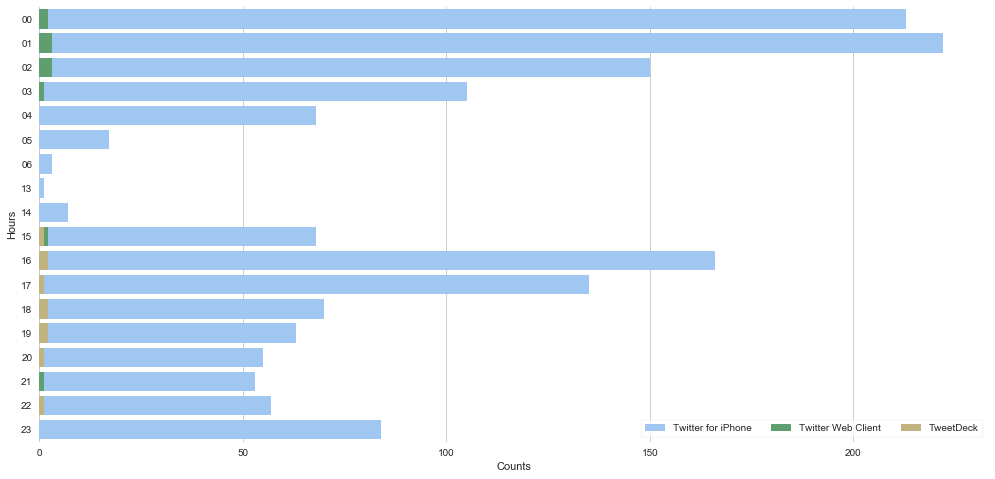

In [92]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(17, 8))

sns.set_color_codes("pastel")

sns.barplot(x="Twitter for iPhone",y=df_q1.index,  data=df_q1,label="Twitter for iPhone", color="b",orient = 'h')
sns.set_color_codes("deep")
sns.barplot(x="Twitter Web Client",y=df_q1.index,  data=df_q1,label="Twitter Web Client", color="g",orient = 'h')
sns.barplot(x='TweetDeck',y=df_q1.index,  data=df_q1,label="TweetDeck", color="y",orient = 'h')

ax.legend(ncol=3, loc="best", frameon=True)

ax.set(ylabel="Hours", xlabel="Counts")
sns.despine(left=True, bottom=True);

结论：通过上图，很明显能看出，WeRateDogs最喜欢发twitter的时间段为凌晨0点-2点，其次为16-18点，在这两个时间段最为活跃；而7-13点的发twitter量近乎为0，估计是因为晚上熬夜，上午要补觉吧。最喜欢用的平台是`Twitter for iPhone`，具有绝对的统治地位，此外，在凌晨的0-4点会间歇的使用`Twitter Web Client`发推，在15-22点会间歇的使用`TwitterDeck`发推。

2.针对已掌握的狗狗评级和评分数据，分析不同等级的狗狗的评分构成，指出哪种等级的狗狗最受人们欢迎？

In [93]:
#复制数据(11.27修改为11)
df_q2 = twitter_archive_clean.copy()

In [94]:
#筛选数据
df_q2 = df_q2[['rating_numerator','stages_of_dog','favorite_count']].dropna()

In [99]:
#为方便之后计算和绘图，将rating_numerator列中的11.27四舍五入为11
df_q2.loc[df_q2[df_q2.rating_numerator == 11.27].index,'rating_numerator'] = 11

In [101]:
#计算每种等级的狗狗评分总数
df_q2_sum = df_q2.stages_of_dog.value_counts()

In [102]:
#计算每种等级的狗狗的评分均值，作为权重
df_q2_mean = df_q2.groupby('stages_of_dog')['rating_numerator'].mean()

In [103]:
#计算每种等级的狗狗所获的`favorite`的均值
df_q2_favorite = df_q2.groupby('stages_of_dog')['favorite_count'].mean()

In [104]:
#按分类和评分重新整理DataFrame
df_q2 = pd.DataFrame(df_q2.groupby('stages_of_dog')['rating_numerator'].value_counts()).rename(columns = {'rating_numerator':'counts'}).reset_index()

In [105]:
#利用评分总数、评分均值及各分数段的评分数量，计算新列:rate = (counts/df_q2_sum)*df_q2_mean
df_q2.loc[df_q2.query('stages_of_dog == "doggo"').index,'rate'] = ((df_q2.query('stages_of_dog == "doggo"')['counts'])/(df_q2_sum['doggo']))*(df_q2_mean['doggo'])
df_q2.loc[df_q2.query('stages_of_dog == "floofer"').index,'rate'] = ((df_q2.query('stages_of_dog == "floofer"')['counts'])/(df_q2_sum['floofer']))*(df_q2_mean['floofer'])
df_q2.loc[df_q2.query('stages_of_dog == "pupper"').index,'rate'] = ((df_q2.query('stages_of_dog == "pupper"')['counts'])/(df_q2_sum['pupper']))*(df_q2_mean['pupper'])
df_q2.loc[df_q2.query('stages_of_dog == "puppo"').index,'rate'] = ((df_q2.query('stages_of_dog == "puppo"')['counts'])/(df_q2_sum['puppo']))*(df_q2_mean['puppo'])

In [117]:
#调整DataFrame
df_q2.rating_numerator = df_q2.rating_numerator.astype('int64')
df_q2 = df_q2.pivot_table(index = 'stages_of_dog',columns = 'rating_numerator',values = 'rate')

In [128]:
df_q2[11] = df_q2[10] + df_q2[11]
df_q2[12] = df_q2[11] + df_q2[12]
df_q2[13] = df_q2[12] + df_q2[13]
df_q2[14] = df_q2[13] + df_q2[14]

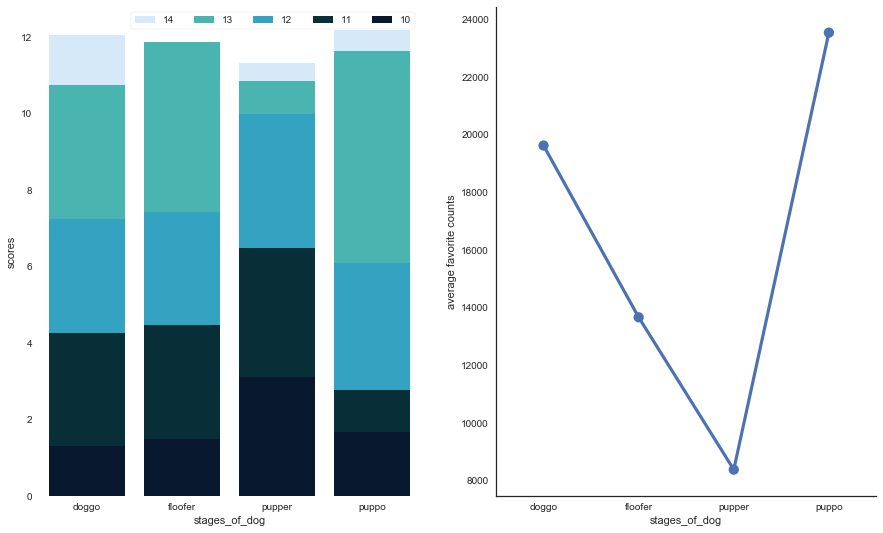

In [219]:
sns.set(style="white")

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

sns.set_color_codes("muted")

sns.barplot(x=df_q2.index,y=14,  data=df_q2,label="14", color="#D0E9FF",ax = ax1)
sns.barplot(x=df_q2.index,y=13,  data=df_q2,label="13", color="#37C6C0",ax = ax1)
sns.barplot(x=df_q2.index,y=12,  data=df_q2,label="12", color="#1DB0D8",ax = ax1)
sns.barplot(x=df_q2.index,y=11,  data=df_q2,label="11", color="#00343F",ax = ax1)
sns.barplot(x=df_q2.index,y=10,  data=df_q2,label="10", color="#011935",ax = ax1)


sns.pointplot(x = df_q2.index,y = 'favorite_count',data = df_q2_fa,label = 'favorite',ax = ax2)


ax1.legend(ncol=5, loc="best", frameon=True)

ax1.set(ylabel="scores", xlabel="stages_of_dog")
ax2.set(ylabel="average favorite counts", xlabel="stages_of_dog")

sns.despine(left = True,bottom = True,ax = ax1)
sns.despine(ax = ax2);

结论：  
**如上左图所示：**
- `puppo`所获的平均评分最高，`doggo`次之，`pupper`最低；
- `puppo`的评分主要集中在12和13分，14分最少；`doggo`的评分中，13分最多，紧随其后的是数量相差不多的12分和11分；`floofer`的评分中13分最多，但14分的数量为0；`pupper`所获得的10、11和12评分数量相当，14分的数量最少。  

**如上右图所示：**
- 依然是`puppo`所获的平均点赞（favorite）数量最高，`doggo`次之，`pupper`最低；

3.WeRateDogs的更新趋势是怎样的？所发twitter的热度呢？

In [312]:
df_q3 = twitter_archive_clean.copy()

In [313]:
#筛选数据
df_q3 = df_q3[['timestamp','retweet_count','favorite_count']]

In [314]:
date_order = np.sort(df_q3.timestamp.apply(lambda x: x.strftime('%Y-%m')).unique())

In [315]:
df_q3.timestamp = pd.DataFrame(df_q3.timestamp.apply(lambda x:x.strftime('%Y-%m')))

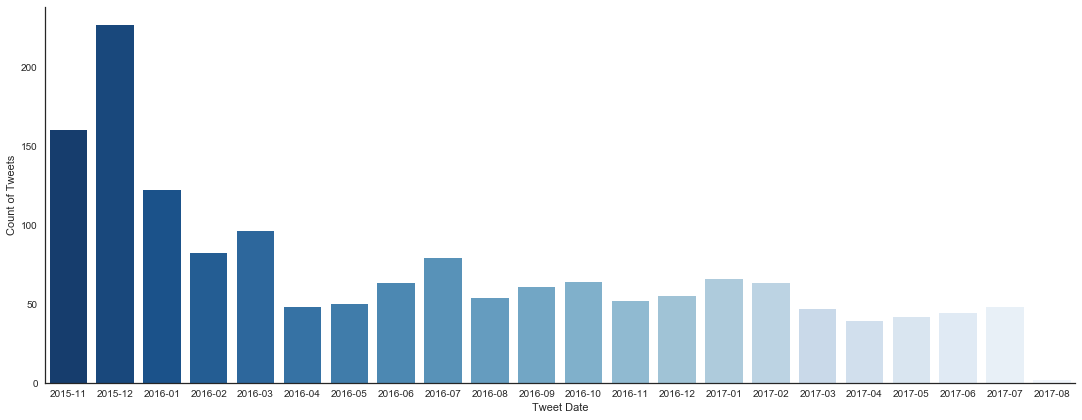

In [316]:
ax = sns.factorplot(x='timestamp', data=df_q3,kind="count", palette= 'Blues_r', size=6, aspect=2.5, order=date_order)
ax.set_xlabels(label='Tweet Date')
ax.set_ylabels(label='Count of Tweets');

In [345]:
df_q3 = df_q3.groupby('timestamp')[['retweet_count','favorite_count']].mean()

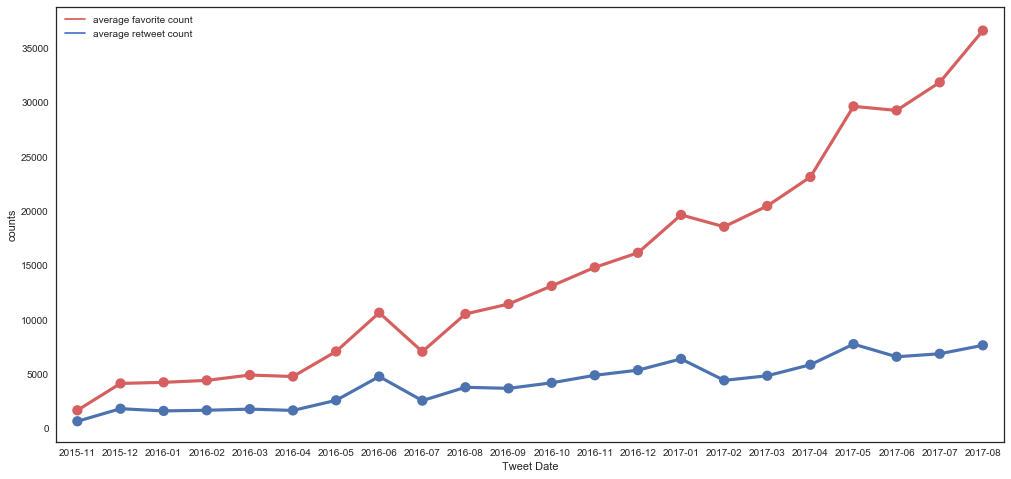

In [377]:
f, ax = plt.subplots(figsize=(17, 8))
sns.pointplot(x =df_q3.index,y = 'retweet_count',data = df_q3,order = date_order)
sns.pointplot(x =df_q3.index,y = 'favorite_count',data = df_q3,order = date_order,color = 'r',label = 'as');


red = mlines.Line2D([], [],color='r', label='average favorite count')
blue = mlines.Line2D([], [],color='b', label='average retweet count')
plt.legend(handles=[red,blue])

ax.set(ylabel="counts", xlabel="Tweet Date");


结论：WeRateDogs的发推量从2015年12月至2016年5月逐渐下降，之后逐渐趋于平稳；就转推量和点赞量来看，WeRateDogs所发twitter的热度逐月提升，按照这个趋势，WeRateDogs会越来越热。

<a id='jielun'></a>
### 结论
- 1.分析全部数据，指出在一天中的哪个时间段人们在twitter上的活跃度最高？是通过什么平台呢？  
&emsp;　WeRateDogs最喜欢发twitter的时间段为凌晨0点-2点，其次为16-18点，在这两个时间段最为活跃；而7-13点的发twitter量近乎为0，估计是因为晚上熬夜，上午要补觉吧。最喜欢用的平台是`Twitter for iPhone`，具有绝对的统治地位，此外，在凌晨的0-4点会间歇的使用`Twitter Web Client`发推，在15-22点会间歇的使用`TwitterDeck`发推。
- 2.针对已掌握的狗狗评级和评分数据，分析不同等级的狗狗的评分构成，指出哪种等级的狗狗最受人们欢迎？
    - `puppo`所获的平均评分最高，`doggo`次之，`pupper`最低；
    - `puppo`的评分主要集中在12和13分，14分最少；`doggo`的评分中，13分最多，紧随其后的是数量相差不多的12分和11分；`floofer`的评分中13分最多，但14分的数量为0；`pupper`所获得的10、11和12评分数量相当，14分的数量最少。  
    - `puppo`所获的平均点赞（favorite）数量最高，最受人们欢迎，`doggo`次之，`pupper`最低；
- 3.WeRateDogs的更新趋势是怎样的？所发twitter的热度呢？  
&emsp;　WeRateDogs的发推量从2015年12月至2016年5月逐渐下降，之后逐渐趋于平稳；就转推量和点赞量来看，WeRateDogs所发twitter的热度逐月提升，按照这个趋势，WeRateDogs会越来越热。